## Introduction to spaCy
spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. It's designed specifically for production use and helps you build applications that process and "understand" large volumes of text.

### The nlp object
At the heart of spaCy is the `NLP` object. It contains the processing pipeline and included language-specific rules for tokenization, etc.

### The doc object
The doc object is created by processing a string of text with the `nlp` object.

### The token object
The token object contains several lexical attributes such as: *is_alpha*, *is_punct*, *like_num* etc. These lexical attributes can be readily used instead of writing regular expressions.

### The span object


When you call `nlp` on a string, spaCy first tokenizes the text and creates a `document` object.
The `token` and `span` objects are views of the `document` object.



In [17]:
from IPython.display import Image
def displayImage(file, width):
    return Image(filename=file, width=width, )

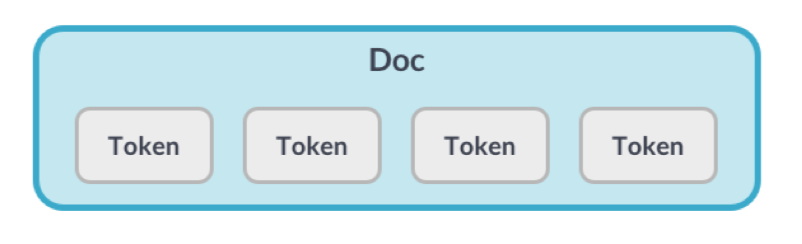

In [18]:
displayImage('../images/tokenObject.png', 400)

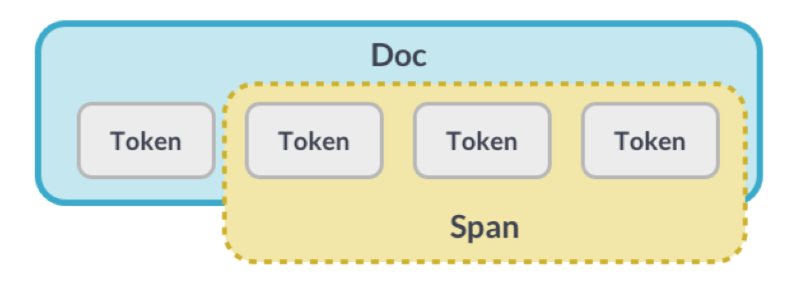

In [19]:
displayImage('../images/spanObject.png', 400)

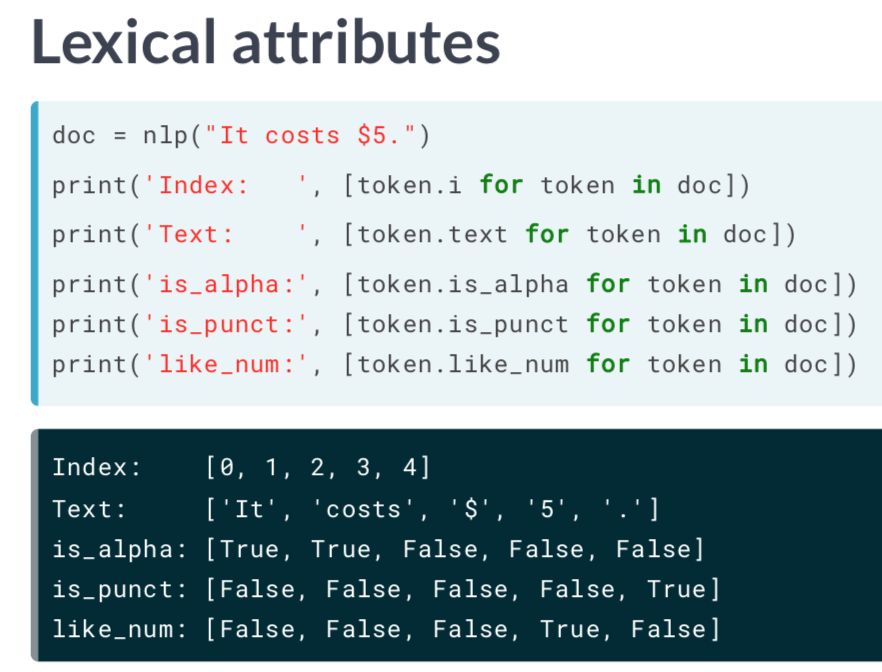

In [20]:
displayImage('../images/lexicalAttributes.png', width=400)

In [2]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


In [6]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


In [7]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


In [9]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


 As you can see, you can do a lot of very powerful analyses using the tokens and their attributes.

## Statistical Models
Let's add some more power to the `nlp` object. Some of the most interesting things you can analyze are context specific, for example, whether a word is a *verb* or a span of text is a person name. Statistical models enables to make predictions in context 

> Enables spaCy to predict linguistic attributes in context.

This usually includes:
- part of speech tags
- syntactic dependencies
- named entities

Models are trained on large datasets of labelled example texts.

spaCy provides a number of `pretrained model packages` that you can download. For example, the `en_core_web_sm` package - the small English model that supports all core capabilities and is trained on the web text. 

The `spacy.load()` method loads a model package and returns an **nlp object**. The package provides the binary weights that enable spacy to make predictions. It also includes the Vocabulary and meta information to tell spacy which language class to use and how to configure the processing pipeline.

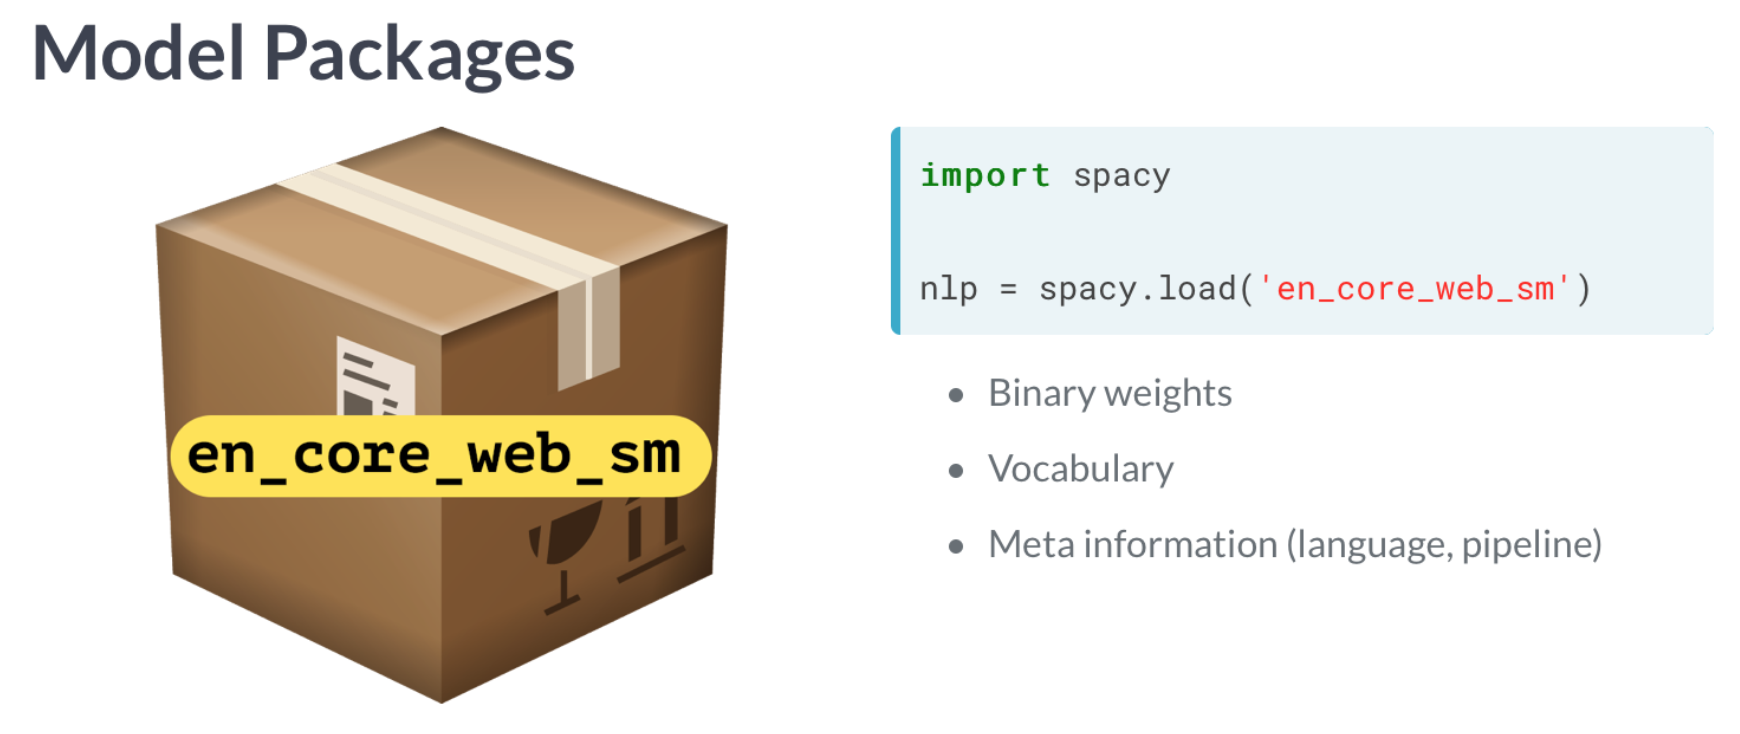

In [21]:
displayImage('../images/modelPackages.png', 600)

> The package provides the binary weights that enable spacy to make predictions. It also includes the vocabulary and meta information to tell spacy which language class to use and how to configure the processing pipeline.

### Using this model to predict POS tags, Dependency labels and Named Entity tags

Let's take a look at the model's predictions. In this example, we are using spaCy to predict part-of-speech tags, the word types in context.  Here are the high level steps:
- First we load the **small English model** and receive the **nlp object**.
- Next, you process the text and receive a **doc object**.
- For each token in the document, we can print the text and the **pos underscore** attribute - the predicted part-of-speech tag.

In addition to the POS tags, we can also predict how the words are related. For example, whether a word is a **subject of the sentence** or an **object**.

The **dep underscore attribute** returns the `predicted dependency label`. The **head attribute** returns the syntactic head token. You can think of the head token as the **parent token this word is attached to**.

To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:
- The pronoun *She* is a nominal subject (**nsub**) attached to the verb *ate*. 
- The noun *pizza* is a direct object (**dobj**) attached to the verb *ate*. It is eaten by the subject *She*.
- The determiner *the*, also known as article, is attached to the noun *pizza*. 

**Named entities** are real world objects that are assigned a name - for example, a person, an organization or country. The `doc.ents` property lets you access the named entities **predicted by the model.**

To get definitions of the most common tags and labels, you can use the spacy's `explain` helper function. 

> "spacy.explain" works the same for part-of-speech tags and dependency labels. 

**Summary**: 
Model packages include:
- Binary weights to make statistical predictions.
- Strings of the model's vocabulary and their hashes.
- A meta file including the language, pipeline and license. 

Here you have learnt:
- part-of-speech tags
- dependency labels
- Named entity tags

You have also learnt *spaCy's statistical models and their predictions*.

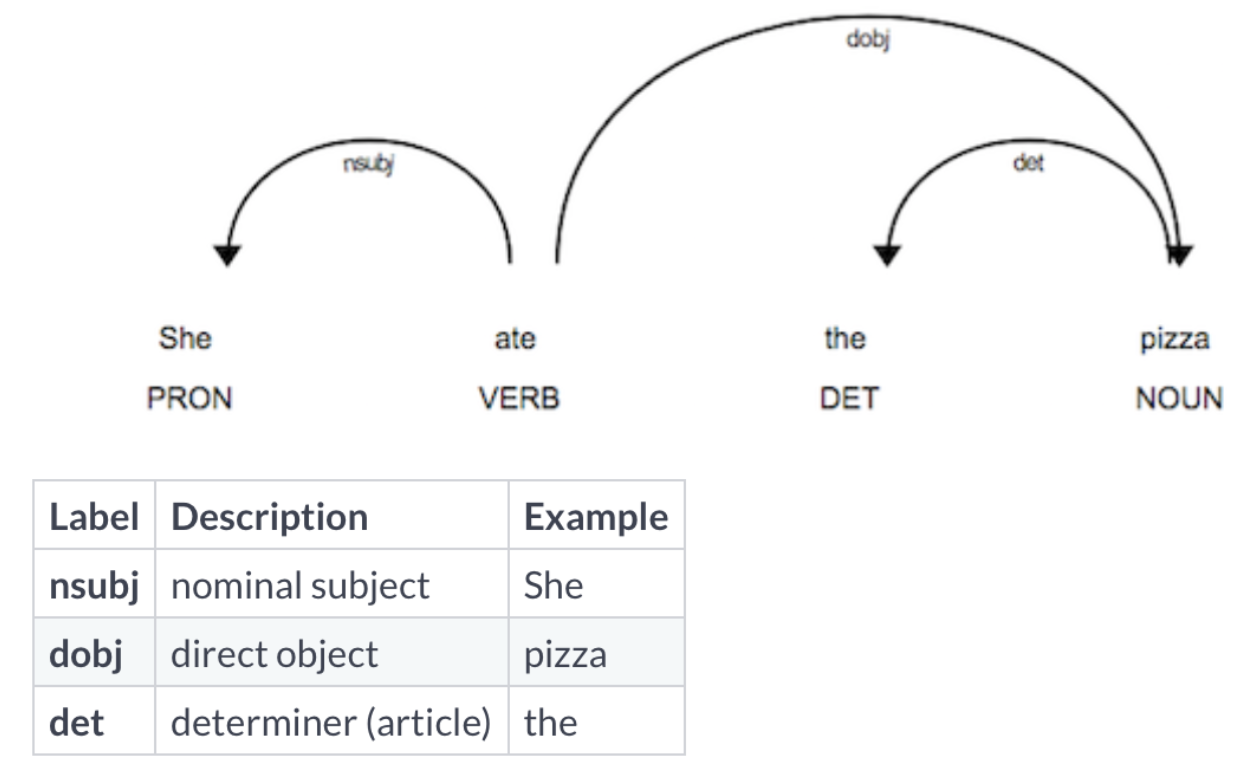

In [22]:
displayImage("../images/syntacticLabels.png", width=600)

### en_core_web_sm
spaCy’s models can be installed as Python packages. This means that they’re a component of your application, just like any other module. They’re versioned and can be defined as a dependency in your requirements.txt. Models can be installed from a download URL or a local directory, manually or via pip. Their data can be located anywhere on your file system.

In [27]:
!python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 11.1MB 25.1MB/s ta 0:00:01
  Running setup.py install for en-core-web-sm ... done
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
import spacy
import en_core_web_sm

# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = en_core_web_sm.load()

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


### Predicting linguistic annotations
You'll now get to try one of spaCy's pre-trained model packages and see its predictions in action.

In [34]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

It          PRON      nsubj     
’s          PROPN     ROOT      
official    NOUN      acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          VERB      ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [35]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


So far, the model has been correct every single time. In the next exercise, you'll see what happens if the model is wrong, and how to adjust it.

## Rule based matching
spaCy's matcher lets you write rules to find words and phrases in text. **Compared to regular expressions, the matcher works with Doc and Token objects instead of only strings.** It's also more flexible: you can search for texts but also other lexical attributes. You can even write rules that use the model's predictions. **For example, find the word duck only if it's a verb and not a noun**. 

### Match patterns
Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of the token attributes, mapped to their expected values. 

## Installing spaCy

In [1]:
!pip install spacy

    100% |████████████████████████████████| 33.5MB 1.0MB/s ta 0:00:011
    100% |████████████████████████████████| 3.0MB 5.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 17.1MB/s ta 0:00:01
    100% |████████████████████████████████| 2.9MB 5.7MB/s ta 0:00:011
    100% |████████████████████████████████| 276kB 6.2MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 6.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 14.5MB/s ta 0:00:01
tensorflow 1.9.0 has requirement setuptools<=39.1.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
